In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Leer csv
df_tiendas_train = pd.read_csv('/content/drive/MyDrive/2024 2Q/Proyecto Final/TP Proyecto/Entrega 3/Codigo E3/tiendas_caba_m2_train.csv')
df_tiendas_val = pd.read_csv('/content/drive/MyDrive/2024 2Q/Proyecto Final/TP Proyecto/Entrega 3/Codigo E3/tiendas_caba_m2_test.csv')

Mounted at /content/drive


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Definir las características (X) y la variable objetivo (y)
x_train = df_tiendas_train.drop(columns=['customer_id', 'cluster'])  # Eliminamos customer_id y cluster
y_train = df_tiendas_train['cluster']

# Definir las características (X) y la variable objetivo (y)
x_val = df_tiendas_val.drop(columns=['customer_id', 'cluster'])  # Eliminamos customer_id y cluster
y_val = df_tiendas_val['cluster']

x = pd.concat([x_train, x_val], axis=0)
y = pd.concat([y_train, y_val], axis=0)

# Modelo

In [3]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Crear el modelo XGBoost
model = XGBClassifier(random_state=42,
                      n_estimators=50,
                      learning_rate=0.01,
                      max_depth=10,
                      min_child_weight=10,  # Equivalente a min_samples_leaf
                      gamma=0,
                      subsample=1,
                      colsample_bytree=1,
                      use_label_encoder=False)

# Entrenar el modelo
model.fit(x_train, y_train)


print("RESULTADOS VAL:")
y_pred = model.predict(x_val)
# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
print(classification_report(y_val, y_pred))

print("RESULTADOS TRAIN:")
y_pred = model.predict(x_train)
# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_train, y_pred)}")
print(classification_report(y_train, y_pred))

print("RESULTADOS TODO:")
y_pred = model.predict(x)
# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y, y_pred)}")
print(classification_report(y, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:47:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RESULTADOS VAL:
Accuracy: 0.4332493702770781
              precision    recall  f1-score   support

           0       0.42      0.41      0.42       159
           1       0.47      0.61      0.53       169
           2       0.17      0.06      0.09        69

    accuracy                           0.43       397
   macro avg       0.35      0.36      0.34       397
weighted avg       0.40      0.43      0.41       397

RESULTADOS TRAIN:
Accuracy: 0.661198738170347
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       636
           1       0.66      0.77      0.71       673
           2       0.66      0.30      0.41       276

    accuracy                           0.66      1585
   macro avg       0.66      0.59      0.60      1585
weighted avg       0.66      0.66      0.65      1585

RESULTADOS TODO:
Accuracy: 0.615539858728557
              precision    recall  f1-score   support

           0       0.62      0.65      0.63    

# Entrenamiento con todos los datos

In [4]:
# Entrenar el modelo con todos los datos

model.fit(x, y)

print("RESULTADOS:")
y_pred = model.predict(x)
# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y, y_pred)}")
print(classification_report(y, y_pred))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:47:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RESULTADOS:
Accuracy: 0.6745711402623612
              precision    recall  f1-score   support

           0       0.67      0.72      0.70       795
           1       0.66      0.79      0.72       842
           2       0.79      0.28      0.41       345

    accuracy                           0.67      1982
   macro avg       0.71      0.60      0.61      1982
weighted avg       0.69      0.67      0.66      1982



# Matriz de confusión

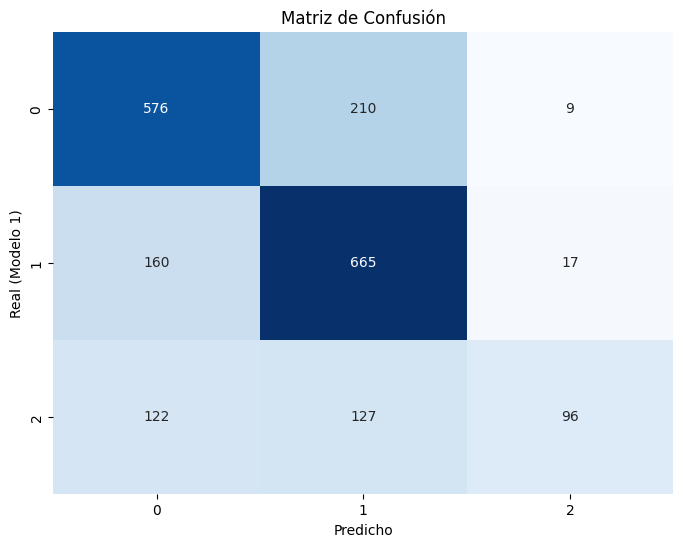

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de confusión
conf_matrix = confusion_matrix(y, y_pred)

# Mostrar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Real (Modelo 1)')
plt.title('Matriz de Confusión')
plt.show()

# Feature Importance

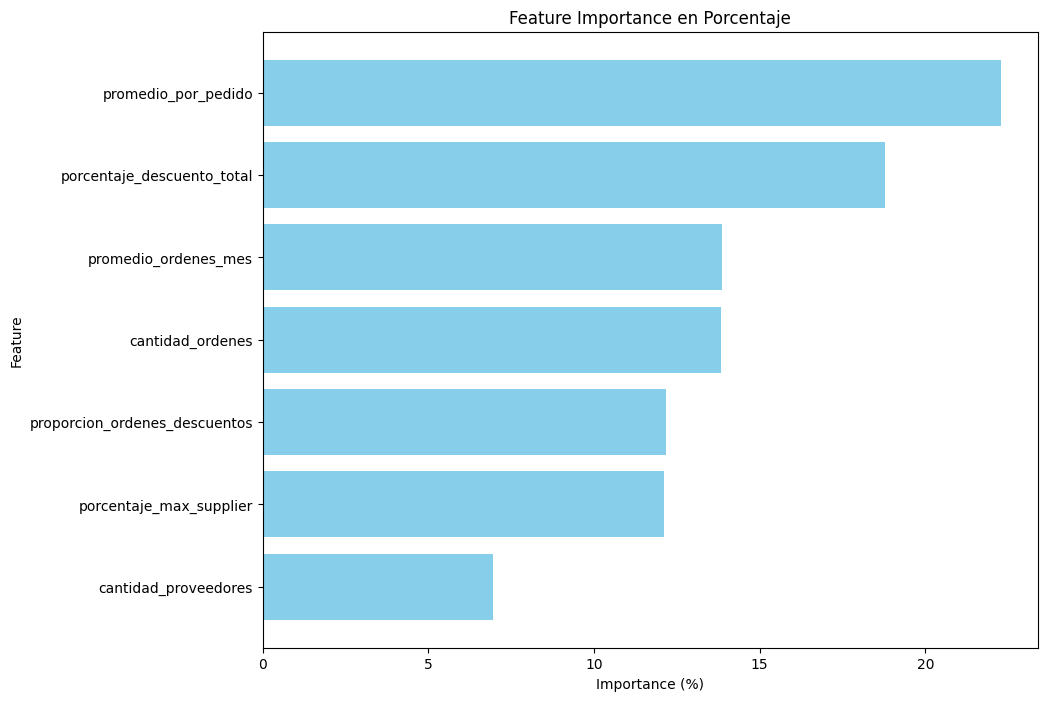

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import plot_importance


# Obtener la importancia de los features
importance_dict = model.get_booster().get_score(importance_type='weight')

# Convertir las importancias a una lista de tuplas y ordenarlas
importances = sorted(importance_dict.items(), key=lambda x_2: x_2[1], reverse=True)

# Extraer los nombres de los features y sus importancias
features, importances = zip(*importances)

# Convertir a porcentajes
total_importance = np.sum(importances)
importances_percentage = (np.array(importances) / total_importance) * 100

# Graficar las importancias en porcentaje
plt.figure(figsize=(10,8))
plt.barh(features[:10], importances_percentage[:10], color='skyblue')
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.title('Feature Importance en Porcentaje')
plt.gca().invert_yaxis()  # Invertir el eje para que los más importantes estén arriba
plt.show()


# Armado CSV final

In [5]:
# ARMAR CSV FINAL

# Combinar los DataFrames de entrenamiento y validación para reconstruir customer_id
df_tiendas_combined = pd.concat([df_tiendas_train, df_tiendas_val], axis=0)

# Crear un DataFrame con las características originales, el customer_id y los resultados
df_resultado = pd.DataFrame(x, columns=x_train.columns)  # Crear un DataFrame con las características

# Añadir el customer_id y la columna de la variable objetivo 'cluster'
df_resultado['customer_id'] = df_tiendas_combined['customer_id'].values
df_resultado['cluster'] = df_tiendas_combined['cluster'].values

# Añadir la columna de predicciones
df_resultado['predicted_cluster'] = y_pred

# Mostrar el DataFrame final
df_resultado.head()


,cantidad_ordenes,cantidad_proveedores,porcentaje_max_supplier,promedio_ordenes_mes,porcentaje_descuento_total,proporcion_ordenes_descuentos,promedio_por_pedido,customer_id,cluster,predicted_cluster
0,117,2,95.726496,14.625000,4.907136,0.905983,579596.661665,48226,0,2
1,11,8,27.272727,1.833333,9.143421,1.000000,219622.911056,16454,1,0
2,141,21,34.751773,6.130435,3.770357,0.680851,200262.671761,17254,2,2
3,14,7,21.428571,1.272727,8.634981,1.000000,215473.385714,20318,2,0
4,78,12,32.051282,6.000000,7.097541,0.923077,182651.171925,394,0,0


In [6]:
df_resultado.to_csv('resultado_m1_m2.csv', index=False)

# Descargar el archivo CSV en tu computadora
from google.colab import files
files.download('resultado_m1_m2.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Shape

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 5.7 MB/s eta 0:00:00


In [ ]:
import shap
import matplotlib.pyplot as plt

# Crear el explainer de SHAP para el modelo XGBoost
explainer = shap.TreeExplainer(model)

# Calcular los valores SHAP para los datos de entrenamiento
shap_values = explainer.shap_values(x)

In [ ]:
# Verifica la forma de shap_values
print(f'Número de muestras: {shap_values.shape[0]}')  # Número de muestras
print(f'Número de características: {shap_values.shape[1]}')  # Número de características
print(f'Número de clases: {shap_values.shape[2]}')  # Número de clases

Número de muestras: 1982
Número de características: 3
Número de clases: 3


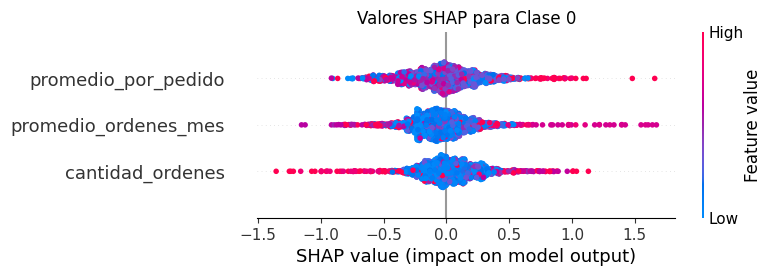

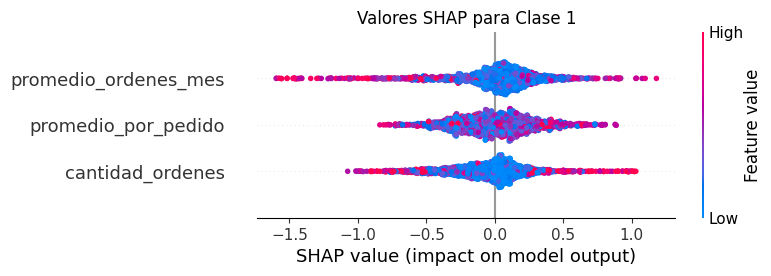

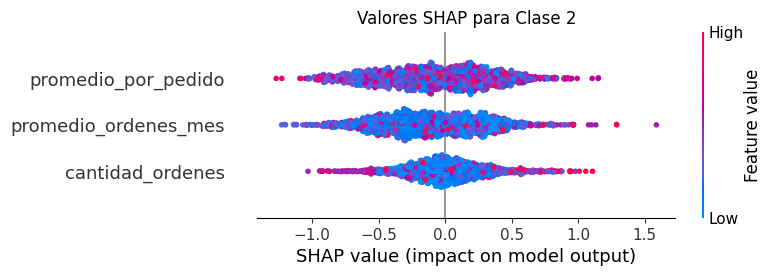

In [ ]:

# Graficar los valores SHAP por clase
for i in range(shap_values.shape[2]):  # Iterar sobre cada clase
    plt.figure(figsize=(10, 8))

    # Extraer los valores SHAP para la clase i
    shap_values_class_i = shap_values[:, :, i]  # Asegúrate de que la selección sea correcta

    # Graficar el resumen de valores SHAP para la clase i
    shap.summary_plot(shap_values_class_i, x, feature_names=x.columns, plot_type="dot", show=False)

    # Título del gráfico
    plt.title(f'Valores SHAP para Clase {i}')

    # Mostrar el gráfico
    plt.show()

<Figure size 1000x800 with 0 Axes>

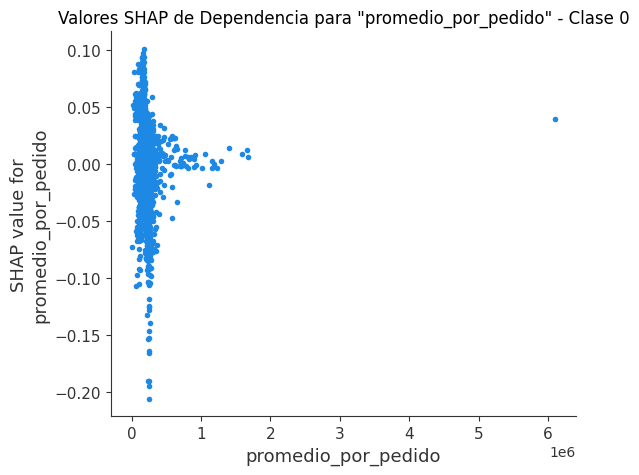

<Figure size 1000x800 with 0 Axes>

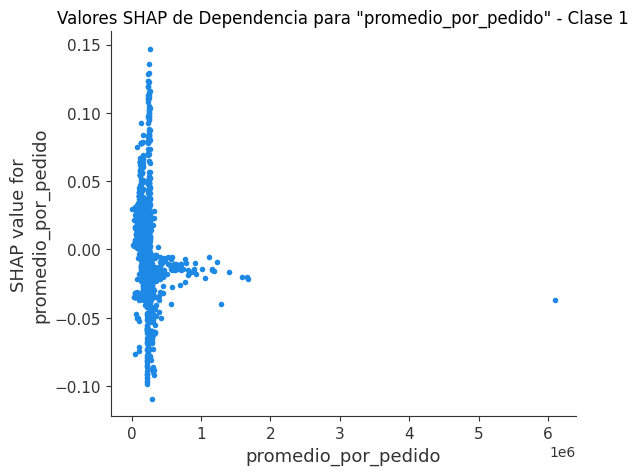

<Figure size 1000x800 with 0 Axes>

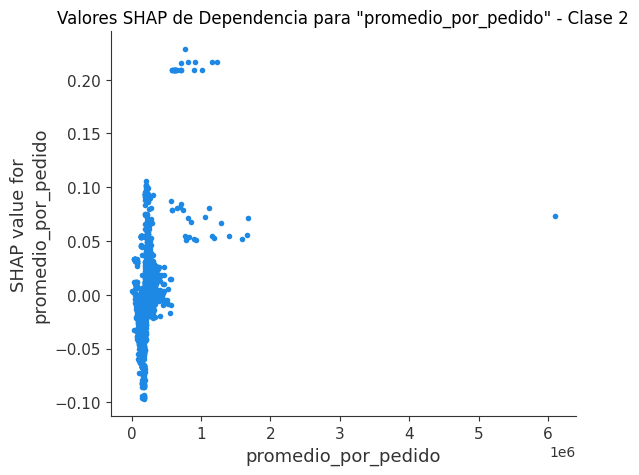

In [ ]:
# Variable específica para graficar
feature = 'promedio_por_pedido'

# Iterar sobre cada clase
for i in range(shap_values.shape[2]):
    plt.figure(figsize=(10, 8))

    # Extraer los valores SHAP para la clase i
    shap_values_class_i = shap_values[:, :, i]

    # Graficar el gráfico de dependencia para la variable promedio_por_pedido sin interacción
    shap.dependence_plot(feature, shap_values_class_i, x, interaction_index=None, show=False)

    # Título del gráfico
    plt.title(f'Valores SHAP de Dependencia para "{feature}" - Clase {i}')

    # Mostrar el gráfico
    plt.show()


In [ ]:
for i in range(shap_values.shape[2]):  # Iterar sobre cada clase
    plt.figure(figsize=(10, 8))

    # Extraer los valores SHAP para la clase i
    shap_values_class_i = shap_values[:, :, i]

    # Graficar el resumen en forma de barras
    shap.summary_plot(shap_values_class_i, x, plot_type="bar", show=False)
    plt.title(f'Importancia Global de las Variables - Clase {i}')
    plt.show()

# Lime

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e4b979e6390cc87ffaaa8c457d53310a7c10f786ddd793b1dba889ac6f21f593
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import numpy as np
import lime
import lime.lime_tabular

# Obtener las probabilidades de predicción
probabilidades = model.predict_proba(x)

# Crear un explainer de LIME para datos tabulares
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(x),
    feature_names=x.columns,
    class_names=[f'Clase {i}' for i in range(probabilidades.shape[1])],
    mode='classification'
)

# Iterar sobre cada clase
for clase in range(probabilidades.shape[1]):
    print(f"\nAnálisis para Clase {clase}:\n")

    # Encontrar la muestra con mayor probabilidad de pertenecer a la clase
    idx_max = np.argmax(probabilidades[:, clase])
    print(f"Muestra con mayor probabilidad de pertenecer a la Clase {clase}: {idx_max} (Probabilidad: {probabilidades[idx_max, clase]:.4f})")

    # Generar la explicación con LIME para la muestra con mayor probabilidad
    exp_max = explainer.explain_instance(x.iloc[idx_max].values, model.predict_proba, num_features=10, top_labels=1)
    exp_max.show_in_notebook(show_table=True)

    # Encontrar la muestra con menor probabilidad de pertenecer a la clase
    idx_min = np.argmin(probabilidades[:, clase])
    print(f"Muestra con menor probabilidad de pertenecer a la Clase {clase}: {idx_min} (Probabilidad: {probabilidades[idx_min, clase]:.4f})")

    # Generar la explicación con LIME para la muestra con menor probabilidad
    exp_min = explainer.explain_instance(x.iloc[idx_min].values, model.predict_proba, num_features=10, top_labels=1)
    exp_min.show_in_notebook(show_table=True)


Output hidden; open in https://colab.research.google.com to view.